In [15]:
import tensorflow as tf
from tensorflow import keras
import random
import numpy as np

In [2]:
dataset = tf.keras.datasets.mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

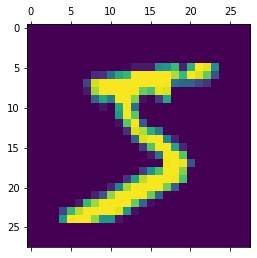

In [4]:
import matplotlib.pyplot as plt
plt.matshow(X_train[0])

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# Build the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [9]:
# Compile the model
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [25]:
# train the model
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1012 - accuracy: 0.9696 - val_loss: 0.0954 - val_accuracy: 0.9703
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0906 - accuracy: 0.9726 - val_loss: 0.0868 - val_accuracy: 0.9740
Epoch 3/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0809 - accuracy: 0.9755 - val_loss: 0.0783 - val_accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0731 - accuracy: 0.9782 - val_loss: 0.0792 - val_accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0669 - accuracy: 0.9795 - val_loss: 0.0785 - val_accuracy: 0.9741


In [26]:
# evaluate
loss, accuracy = model.evaluate(X_test, Y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.0785 - accuracy: 0.9741
0.0784815177321434
0.9740999937057495


1/1 [==============================] - 0s 33ms/step


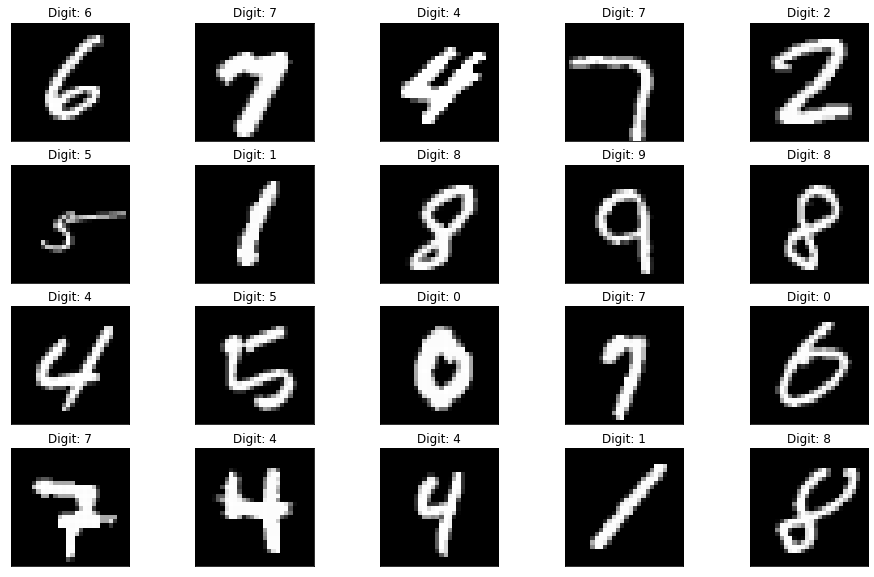

In [27]:
# see predictions
def plot_digit(image, label, i):
    plt.subplot(4, 5, i+1)
    plt.imshow(image, cmap= plt.get_cmap('gray'))
    plt.title(f"Digit: {label}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize = (16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    label = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis = -1)
    plot_digit(image, label, i)
plt.show()

In [28]:
acc = history.history['accuracy']
valacc = history.history['val_accuracy']
loss = history.history['loss']
valloss = history.history['val_loss']
epochs = 5
range_epochs = range(epochs)

<Figure size 576x576 with 0 Axes>

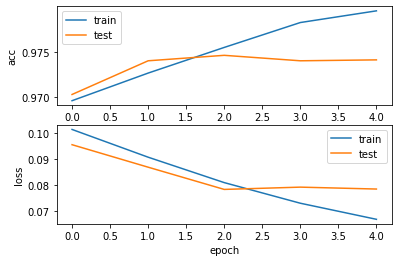

<Figure size 576x576 with 0 Axes>

In [30]:
#graphs

plt.subplot(2, 1, 1)
plt.plot(range_epochs, acc, label = 'Training acc')
plt.plot(range_epochs, valacc, label = 'testing acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'test'])

plt.subplot(2, 1, 2)
plt.plot(range_epochs, loss, label = 'Training loss')
plt.plot(range_epochs, valloss, label = 'testing loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

plt.figure(figsize = (8, 8))